In [2]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,Unnamed: 1,Questions,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Interviewer,Interviewee,1: Do you have a reusable bottle? Why/ Why not?,2: What brand is your bottle? Why?,3: Where do you drink from the bottle? Can you...,4: How do you hold your bottle when you have i...,5: Do you use your water bottle in a way that ...,6: When was the last time you experienced an i...,7: How often do you drink from your water bott...,8. How much volume can your bottle hold?
1,Mandy,Laurel,Yes for going out studying,Hydro Flask because I like the colors,Presses straw tab to open spout then sips. No ...,She holds the convenient handle because,No just ice water,Cons: pulling out during class loud metal echo,Tries to stay hydrated throughout the day usin...,32 Oz. Easy to tell how full by shaking and li...
2,Mandy,Kevin,yeah I have a reusable water bottle,camelback,NaN,NaN,sometimes I’ll put my phone up against it as l...,have not experienced much inconvenience with e...,how often I use waterbottle: 3/10\n\nhow activ...,25 Oz
3,Mandy,Mera,"Yes, good for environment and not wasting anyt...",Hydro Flask; good for environment and not wast...,Straw,Uses her hold hand to grip the body. \nWhy? Di...,Rolling out muscles,"Loud when she dropped it, slippery (the body)\...","10/10 use: at school, working out, in car\n6/6...",32 Oz
4,David,Thomas,Yes because it’s cost effective - dont need to...,"Hydro Flask, no particular reason. Just though...",The opening at the top. He uses both hands to ...,Wraps a couple fingers around the loop at the ...,Has sticker on water bottle - form of self exp...,I really hate when I accidentally drop this th...,Tries to drink from it at least once a day. Sa...,24 Oz
5,David,Nick,"Yes, so he can take it to the gym without worr...","Hydro Flask, likes the color options and shape...",Drinks from an opening with a suction at the t...,Holds it by the handle. Has it in the water bo...,No,Leaks a little from the top. Thinks the sealin...,"Only when going to the gym, which is about 3-4...",16 oz
6,David,Ayushi,"Yes, it's convenient to take to school.",Other,Straw at the top. Flips it open by pushing on ...,By the loop at the top. Fingers easily fit thr...,"Yes, paperweight.","Is damaged easily, the surface is covered in s...","Almost all the time, the straw makes it much m...",30 Oz
7,Tammy,Cassy,yes because i found it in my house and it’s co...,"thermoflask, no reason but it's off-brand hydr...",Drinks from a little opening at the top that s...,the handle/hook at the top of the water bottle...,"self defense, if necessary",when it's in her backpack and it makes the wei...,"once an hour, and she has had her bottle for 3...",24 oz
8,Tammy,Shruthi,yes because it’s good for the environment it’...,"hydroflask, it's reliable",drinks from the flip-up straw holding the bott...,"the little loop at the top, it's a big water b...",not really but one time for a beverage that wa...,it’s sometimes leaky because theres no protect...,"multiple times an hour, she's had it for aroun...",40 oz
9,Tammy,Ava,yes because it's insulating and keeps her wate...,hydroflask,from the sippy lid opening at the top that pul...,by the handle at the top but also since it's r...,no,flying out during thanksgiving break towards ...,"once every 2 hours, tries to drink from it fre...",24 oz


In [4]:
df_questions = pd.DataFrame(df.iloc[0])
df_questions = df_questions.reset_index()
df_questions.index = np.arange(1, len(df_questions) + 1)
df_questions = df_questions.rename(columns={'0': 'Questions'})
df_questions = df_questions.drop(columns=['index'])
df_questions

,0
1,Interviewer
2,Interviewee
3,1: Do you have a reusable bottle? Why/ Why not?
4,2: What brand is your bottle? Why?
5,3: Where do you drink from the bottle? Can you...
6,4: How do you hold your bottle when you have i...
7,5: Do you use your water bottle in a way that ...
8,6: When was the last time you experienced an i...
9,7: How often do you drink from your water bott...
10,8. How much volume can your bottle hold?


In [5]:
df_brand = pd.DataFrame()
brands = ['Hydro Flask', 'Camelback', 'Thermoflask', 'Other']
df_brand['Brands'] = brands
df_brand['Count'] = [6, 1, 1, 1]
df_brand

,Brands,Count
0,Hydro Flask,6
1,Camelback,1
2,Thermoflask,1
3,Other,1


Text(0, 0.5, 'Count')

<Figure size 360x360 with 0 Axes>

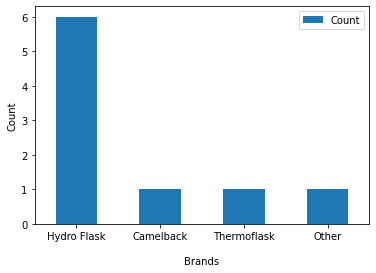

In [6]:
plt.figure(figsize=(5, 5))
ax = df_brand.plot.bar(x='Brands', y='Count', rot=0)

plt.xlabel("Brands", labelpad = 15)
plt.ylabel("Count")

In [7]:
volume = df['Unnamed: 9']
df_vol = pd.DataFrame(volume)
df_vol = df_vol.drop(0)
df_vol = df_vol.rename(columns={'Unnamed: 9': 'Volume'})
df_vol['Volume'] = df_vol.Volume.str.extract('(\d+)')
df_vol.sort_values('Volume', inplace=True)
df_vol

,Volume
5,16
4,24
7,24
9,24
2,25
6,30
1,32
3,32
8,40


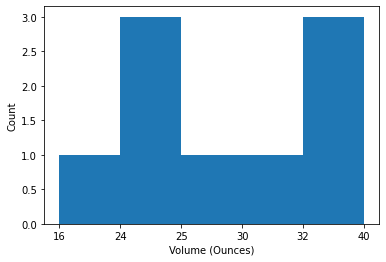

In [8]:
plt.hist(df_vol['Volume'], density=False, bins=5)
plt.ylabel('Count')
plt.xlabel('Volume (Ounces)');

In [17]:
volume_data = df[['Unnamed: 1', 'Unnamed: 9']].copy()
volume_data = volume_data.drop(0)
volume_data = volume_data.rename(columns={'Unnamed: 9': 'Volume', 'Unnamed: 1': 'Name'})
volume_data
volume_data['Volume'] = volume_data.Volume.str.extract('(\d+)')
volume_data

,Name,Volume
1,Laurel,32
2,Kevin,25
3,Mera,32
4,Thomas,24
5,Nick,16
6,Ayushi,30
7,Cassy,24
8,Shruthi,40
9,Ava,24


In [28]:
import statistics as st
all_time_mean = (32 + 32 + 30 + 24 + 40) / 5
frequent_mean = (16 + 24) / 2
rare_mean = (24 + 25) / 2
total_mean = list(volume_data['Volume'].astype(int))
total_mean = st.mean(total_mean)


print(f"Interviewees who used their bottle the most had a mean volume of {all_time_mean} ounces")
print(f"The average volume of all our interviewees is {total_mean} ounces")

Interviewees who used their bottle the most had a mean volume of 31.6 ounces
The average volume of all our interviewees is 27.444444444444443 ounces
